In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 4050188
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 17:22:42.951151
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 4050188
End date and time using str method of datetime object:
2016-12-23 17:27:21.628034
Execution Completed


In [5]:
dfs.shape

(604800, 16)

In [7]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,68647901,2015-12-23,00:00:00,234.85,234.43,234.43,6.37,28.56,15.69,23.76,11526.41,11866.85,0.85,5903,11674379.52,Torschlag_Trafo_23122015.csv
1,68647902,2015-12-23,00:00:01,234.85,234.43,234.43,6.37,28.56,15.69,20.58,11526.41,11866.85,0.85,5903,11674379.52,Torschlag_Trafo_23122015.csv
2,68647903,2015-12-23,00:00:02,234.78,234.45,234.36,6.34,24.82,15.60,20.58,10627.32,10955.93,0.87,5903,11674393.60,Torschlag_Trafo_23122015.csv
3,68647904,2015-12-23,00:00:03,234.78,234.45,234.36,6.34,24.82,15.60,20.58,10627.32,10955.93,0.87,5903,11674393.60,Torschlag_Trafo_23122015.csv
4,68647905,2015-12-23,00:00:04,234.78,234.45,234.36,6.34,24.82,15.60,20.58,10627.32,10955.93,0.87,5903,11674393.60,Torschlag_Trafo_23122015.csv


In [8]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604795,69520716,2015-12-26,23:59:55,236.98,236.58,236.44,4.70,20.49,10.91,14.77,8340.17,8538.66,0.86,13455,12801652.48,Torschlag_Trafo_26122015.csv
604796,69520717,2015-12-26,23:59:56,237.14,236.80,236.57,4.74,19.89,10.94,14.77,8340.17,8538.66,0.86,13455,12801652.48,Torschlag_Trafo_26122015.csv
604797,69520718,2015-12-26,23:59:57,237.14,236.80,236.57,4.74,19.89,10.94,14.77,8191.64,8426.93,0.86,13455,12801662.72,Torschlag_Trafo_26122015.csv
604798,69520719,2015-12-26,23:59:58,237.14,236.80,236.57,4.74,19.89,10.94,14.77,8191.64,8426.93,0.86,13455,12801662.72,Torschlag_Trafo_26122015.csv
604799,69520720,2015-12-26,23:59:59,237.14,236.80,236.57,4.74,19.89,10.94,14.77,8191.64,8426.93,0.86,13455,12801662.72,Torschlag_Trafo_26122015.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [9]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [10]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [11]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [12]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

371

In [13]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.239020,0.244155,0.233712,-0.105523,-0.058943,-0.068318,0.009267,-0.070550,-0.076694,-0.132785,0.239735,0.047458
V1,0.239020,1.000000,0.987444,0.992091,-0.246438,-0.281865,-0.229996,-0.155052,-0.259423,-0.254677,-0.174845,-0.353987,-0.422401
V2,0.244155,0.987444,1.000000,0.992466,-0.321245,-0.380712,-0.319324,-0.250386,-0.350208,-0.345698,-0.175012,-0.386197,-0.456089
V3,0.233712,0.992091,0.992466,1.000000,-0.285576,-0.331566,-0.286449,-0.215500,-0.309691,-0.304949,-0.176132,-0.381027,-0.450699
I1,-0.105523,-0.246438,-0.321245,-0.285576,1.000000,0.917839,0.948432,0.521162,0.966903,0.970543,0.441244,0.173025,0.247336
I2,-0.058943,-0.281865,-0.380712,-0.331566,0.917839,1.000000,0.948290,0.768590,0.979830,0.979458,0.307246,0.250454,0.324620
I3,-0.068318,-0.229996,-0.319324,-0.286449,0.948432,0.948290,1.000000,0.663028,0.985478,0.986465,0.374476,0.209985,0.284940
I_N,0.009267,-0.155052,-0.250386,-0.215500,0.521162,0.768590,0.663028,1.000000,0.676881,0.678585,-0.048759,0.224705,0.281812
Pges,-0.070550,-0.259423,-0.350208,-0.309691,0.966903,0.979830,0.985478,0.676881,1.000000,0.998738,0.388528,0.227408,0.302812
Sges,-0.076694,-0.254677,-0.345698,-0.304949,0.970543,0.979458,0.986465,0.678585,0.998738,1.000000,0.374777,0.218166,0.294224


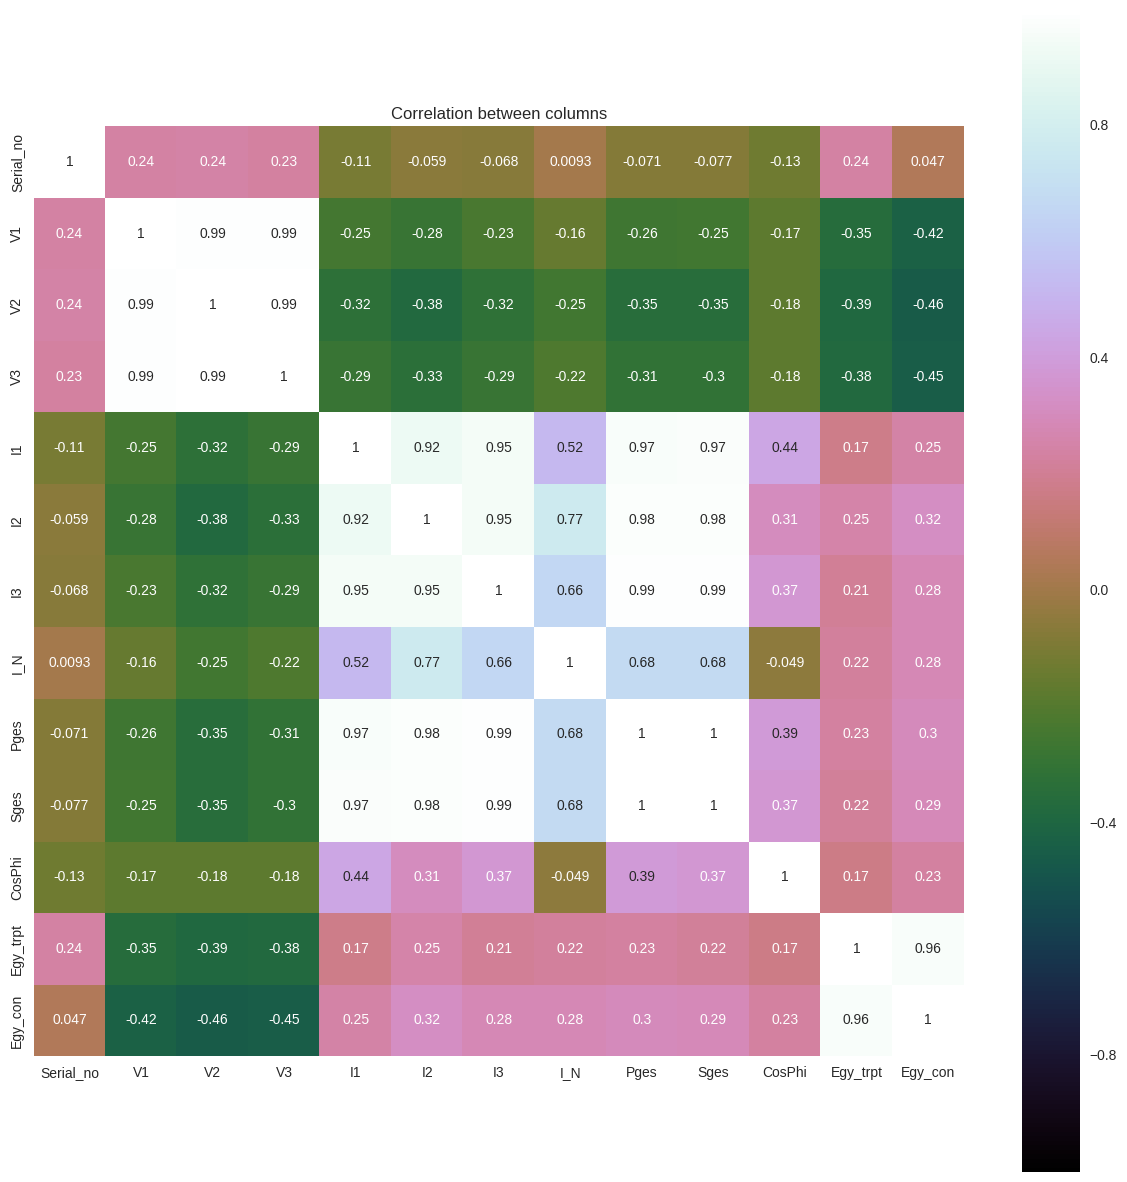

In [14]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_4050187_4654987.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [15]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [16]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000
mean,234.028133,233.552442,233.461598,15.367961,31.039804,25.455166,17.926579,15753.007056,16747.535488,0.878742,15513.740341,18621988.131458
std,1.705218,1.752517,1.726222,19.933542,27.963106,25.227359,10.422637,15720.021226,16625.246114,0.052581,7377.159961,7209773.581678
min,228.800000,228.390000,228.140000,1.100000,2.740000,3.030000,4.180000,-3480.660000,2454.070000,0.430000,5903.000000,11674379.520000
25%,232.740000,232.230000,232.180000,4.840000,14.150000,10.800000,11.020000,7087.500000,7505.500000,0.860000,10631.000000,12389598.720000
50%,233.830000,233.340000,233.240000,6.490000,18.600000,14.250000,14.650000,8716.110000,9148.570000,0.890000,12483.000000,12714544.640000
75%,235.220000,234.730000,234.600000,14.030000,33.070000,24.990000,21.550000,14481.290000,15021.530000,0.910000,23911.000000,26597765.120000
max,239.010000,238.700000,238.770000,136.630000,172.670000,164.170000,95.100000,95676.230000,101733.240000,1.000000,23911.000000,27846748.160000


# Saving the basic statistics to csv

In [17]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_4050187_4654987_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [17]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [18]:
#dfs_grp_loc.groupby('Location').describe()

In [18]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_23122015.csv CosPhi     1.000000 -0.098462       NaN   
                             Egy_con   -0.098462  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.503766  0.046161       NaN   
                             I2         0.405002  0.088239       NaN   
                             I3         0.429069  0.060187       NaN   
                             I_N       -0.049385  0.145056       NaN   
                             Pges       0.468849  0.071584       NaN   
                             Serial_no -0.094632  0.982058       NaN   
                             Sges       0.449470  0.070374       NaN   
                             V1        -0.137926  0.481284       NaN   
                             V2        -0.129905  0.387511       NaN   
                             V3        -0.088605  0.479821       NaN   
Torschlag_Trafo_24012016.csv CosPhi     1.000000 -0.057313  0.022646   
                             Egy_con   -0.057313  1.000000  0.891564   
                             Egy_trpt   0.022646  0.891564  1.000000   
                             I1         0.410698  0.255570  0.234486   
                             I2        -0.364764  0.142153 -0.030736   
                             I3         0.310120  0.352414  0.455672   
                             I_N       -0.653716  0.095281 -0.072525   
                             Pges       0.104646  0.277858  0.193980   
                             Serial_no -0.074492  0.997657  0.897345   
                             Sges       0.021170  0.319523  0.241101   
                             V1        -0.108817  0.550607  0.449232   
                             V2        -0.050935  0.521824  0.422786   
                             V3        -0.107924  0.535077  0.435086   
Torschlag_Trafo_24122015.csv CosPhi     1.000000  0.043255  0.030461   
                             Egy_con    0.043255  1.000000  0.881819   
                             Egy_trpt   0.030461  0.881819  1.000000   
                             I1         0.478865  0.239311  0.371853   
...                                          ...       ...       ...   
Torschlag_Trafo_25122015.csv Sges       0.316751  0.492332  0.434658   
                             V1         0.049451  0.885981  0.899118   
                             V2         0.087291  0.866065  0.885212   
                             V3         0.087120  0.871069  0.881652   
Torschlag_Trafo_26012016.csv CosPhi     1.000000 -0.370923       NaN   
                             Egy_con   -0.370923  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.558390 -0.060461       NaN   
                             I2         0.382892  0.100222       NaN   
                             I3         0.509493  0.057099       NaN   
                             I_N       -0.045130  0.329842       NaN   
                             Pges       0.491396  0.044812       NaN   
                             Serial_no -0.358298  0.980680       NaN   
                             Sges       0.483191  0.042361       NaN   
                             V1        -0.008970  0.204388       NaN   
                             V2        -0.059538  0.146587       NaN   
                             V3        -0.053074  0.185880       NaN   
Torschlag_Trafo_26122015.csv CosPhi     1.000000 -0.216741 -0.203452   
                             Egy_con   -0.216741  1.000000  0.904782   
                             Egy_trpt  -0.203452  0.904782  1.000000   
                             I1         0.447140 -0.088909 -0.062835   
                             I2        -0.262944  0.130318  0.009943   
                             I3         0.037826 -0.051920  0.060204   
          

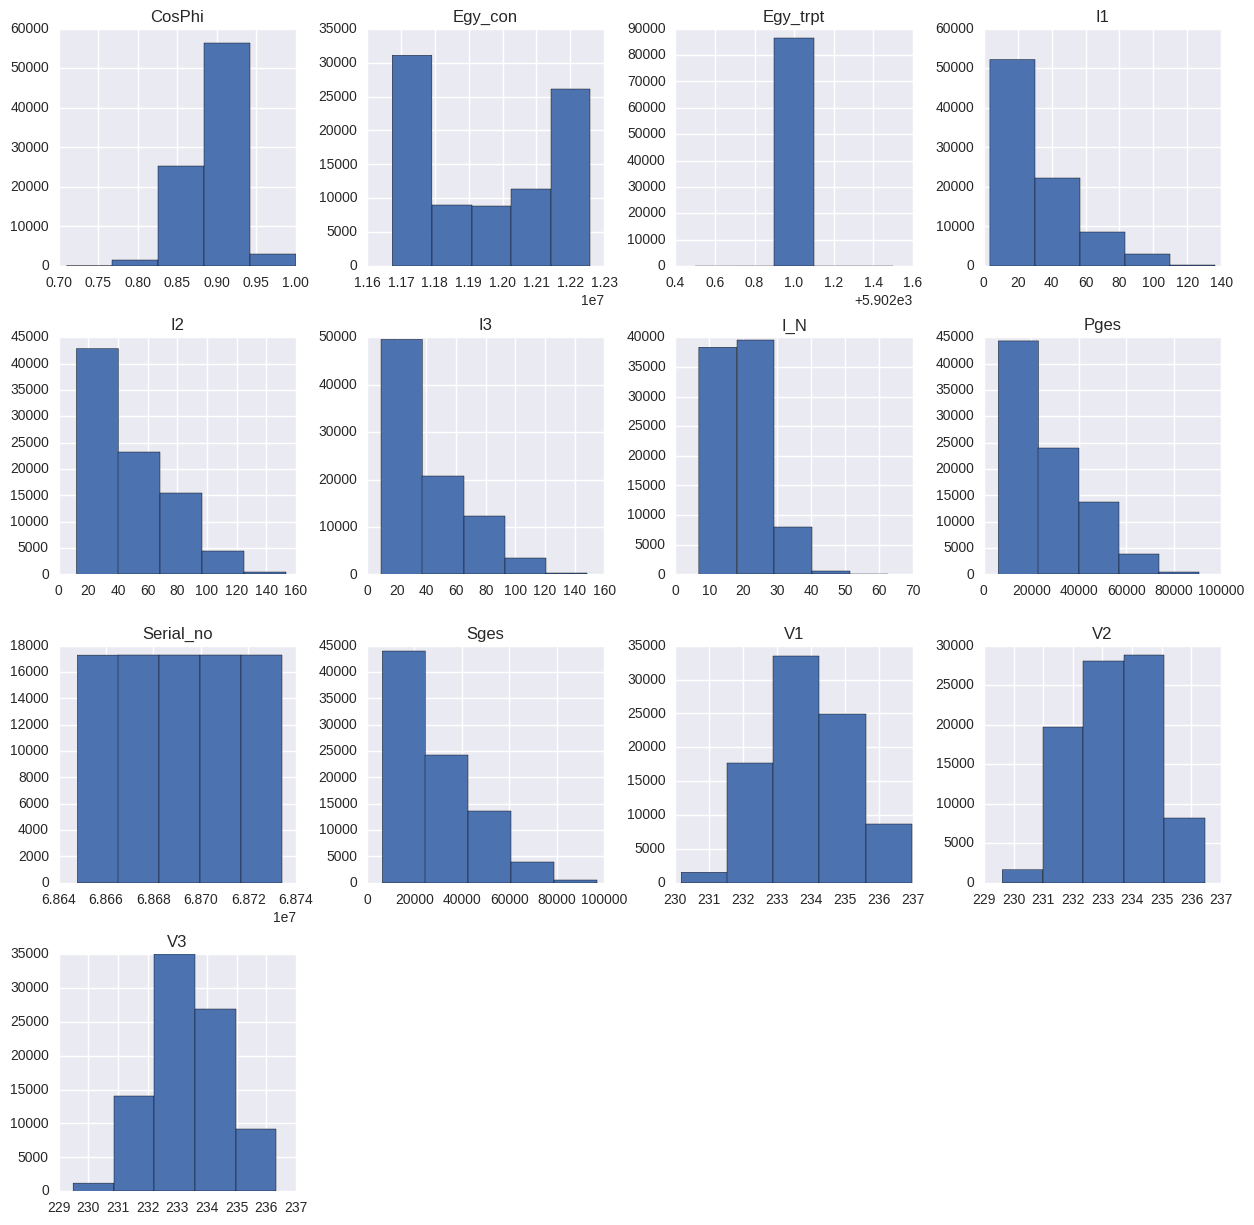

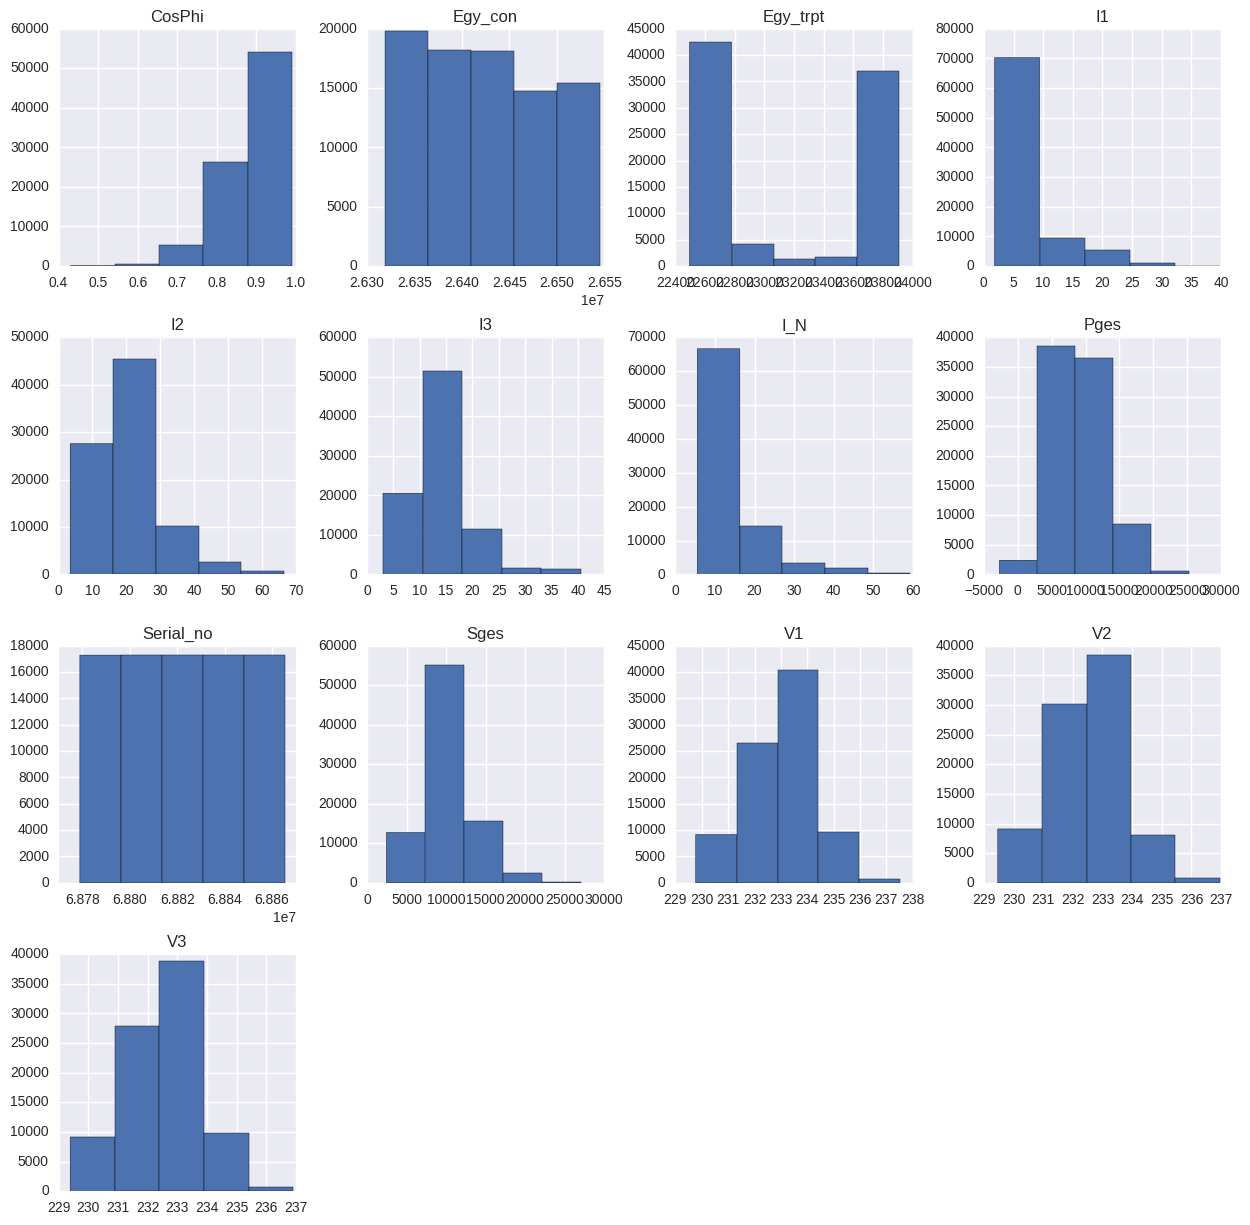

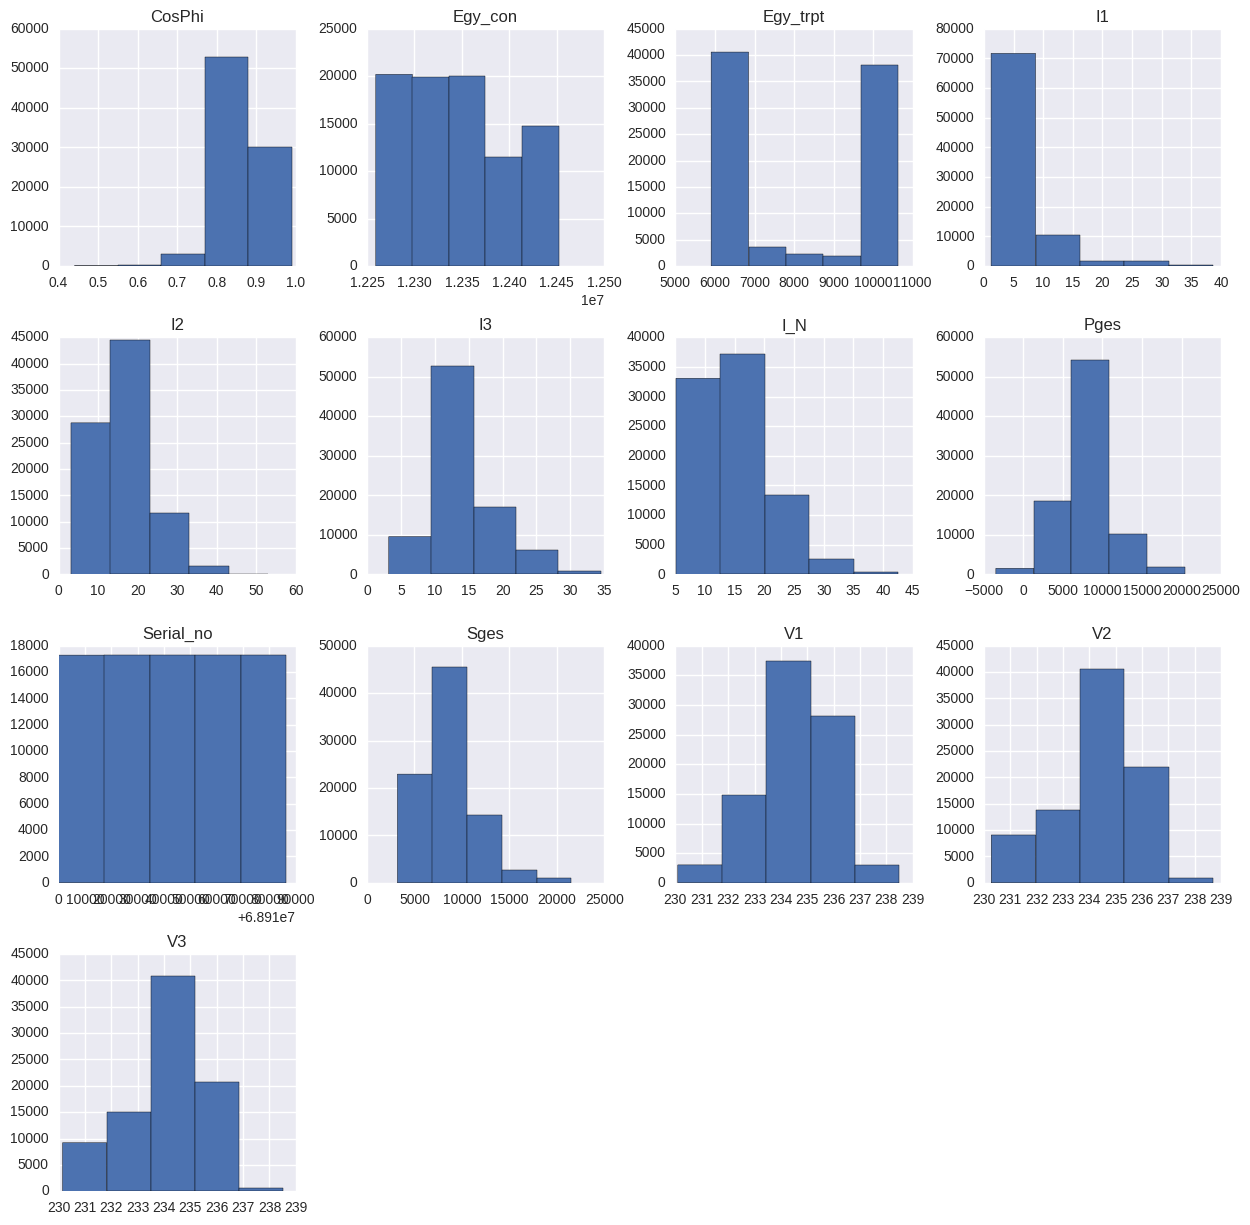

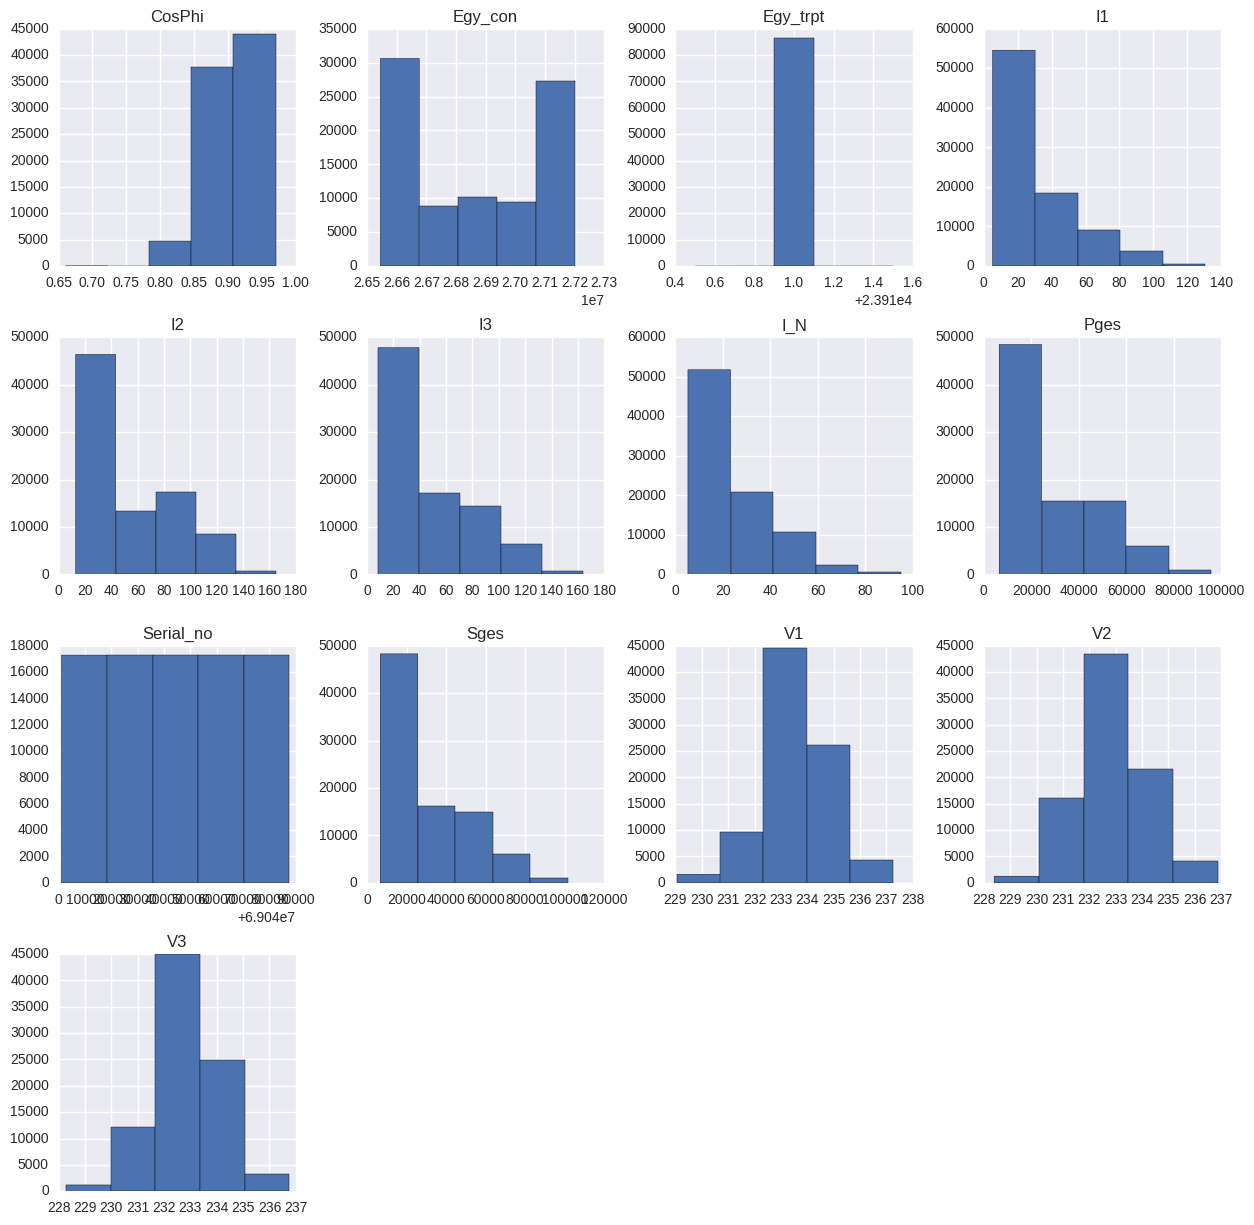

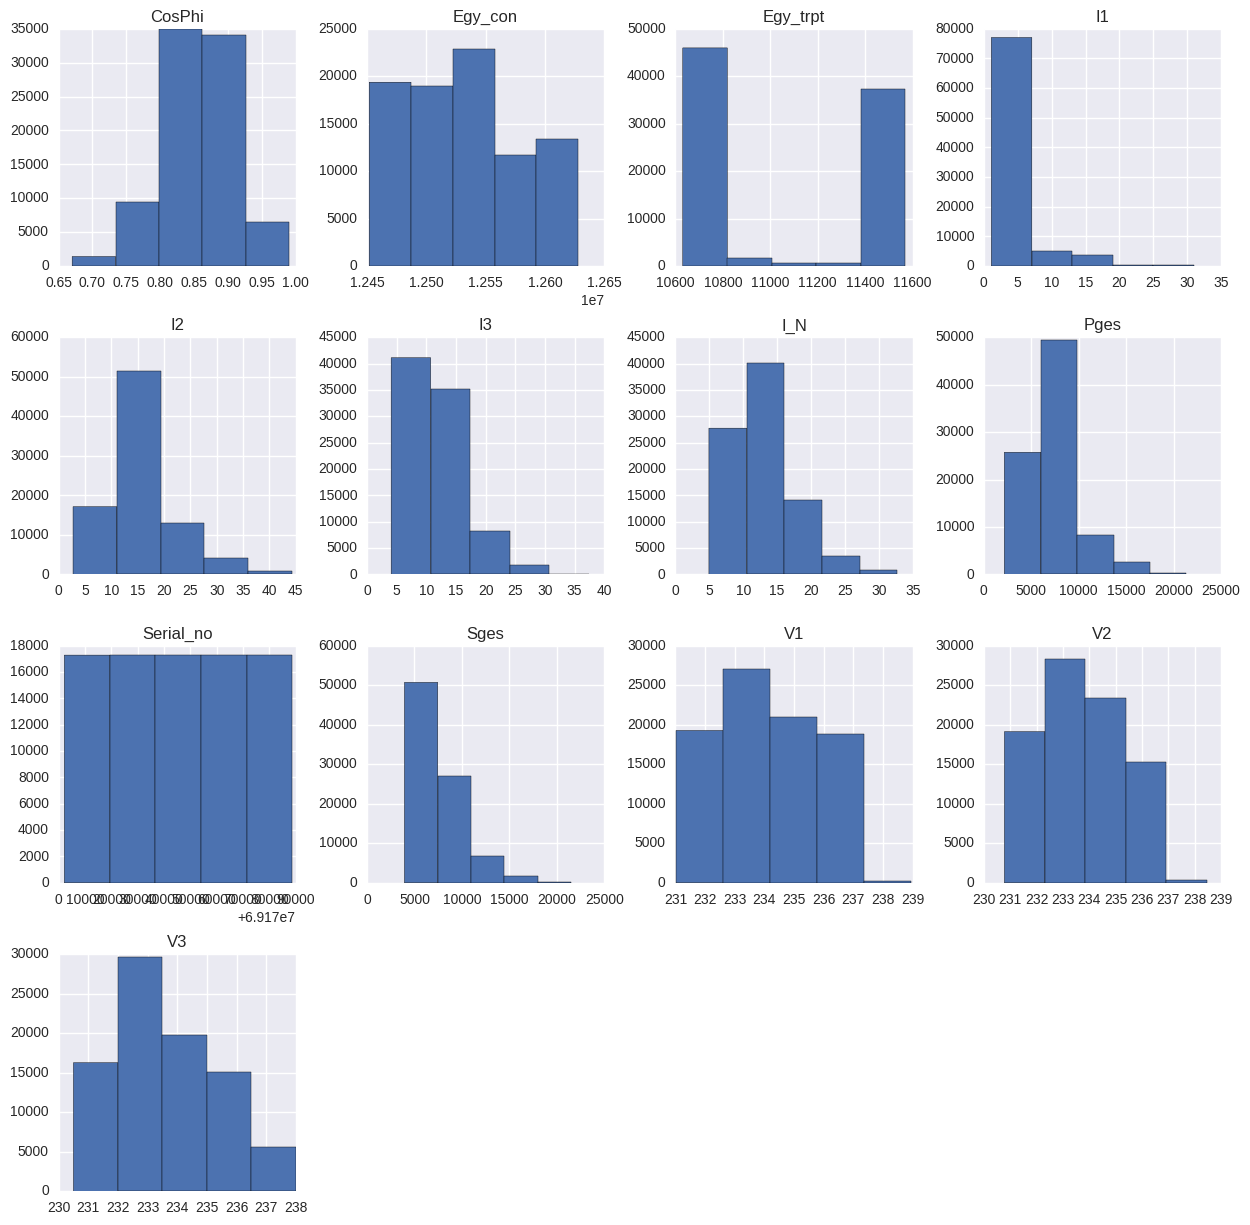

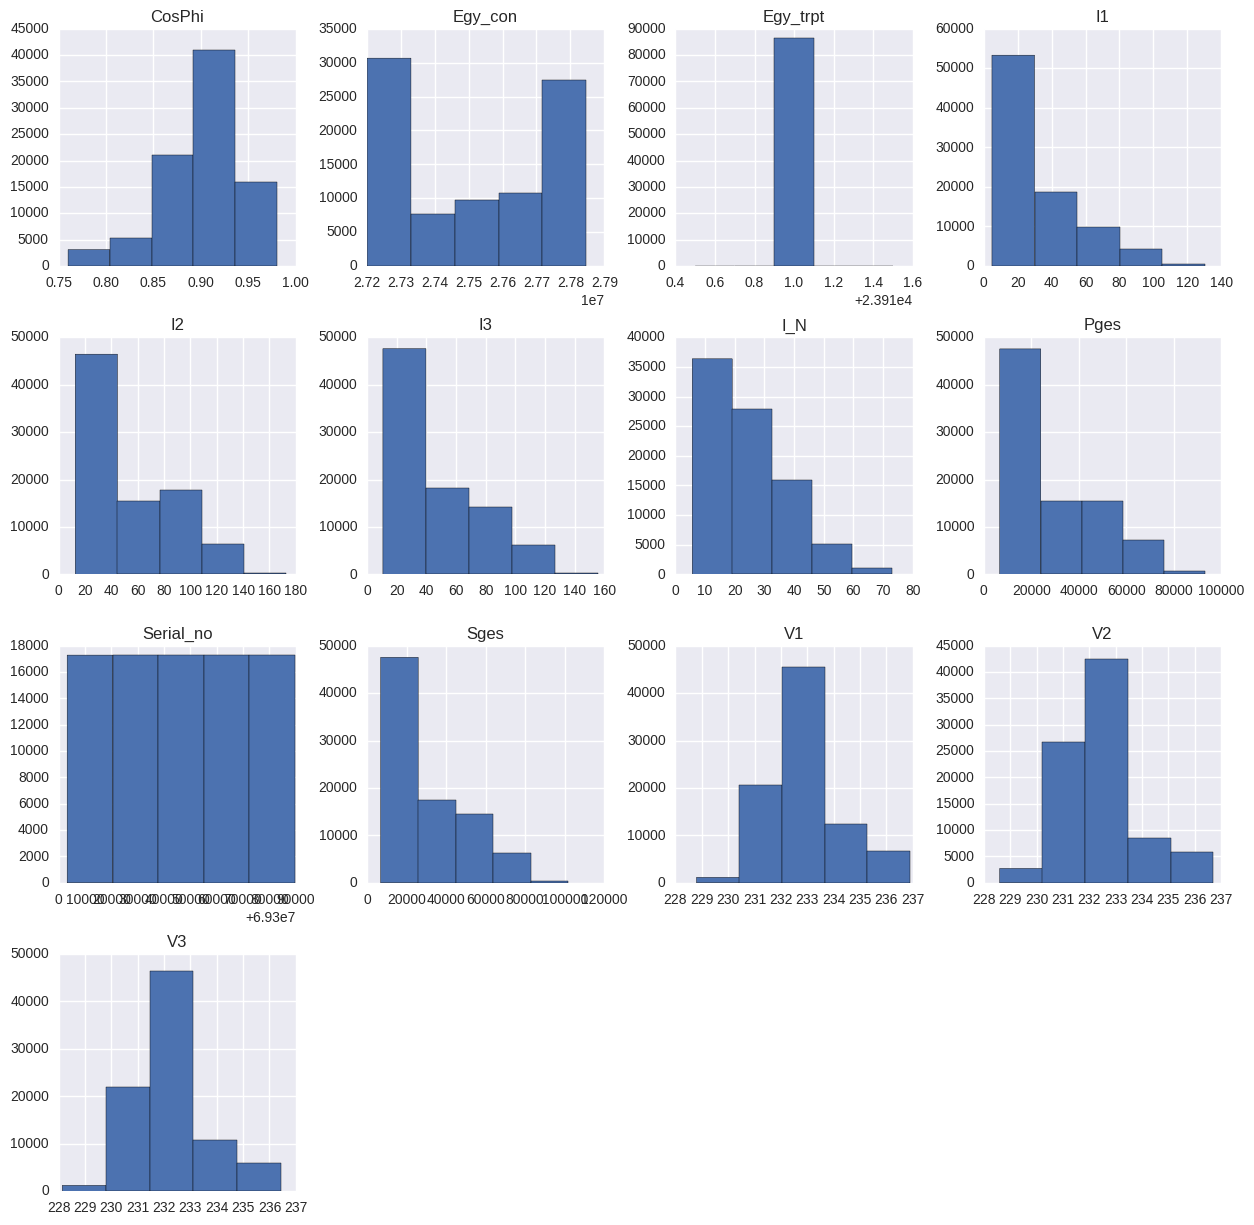

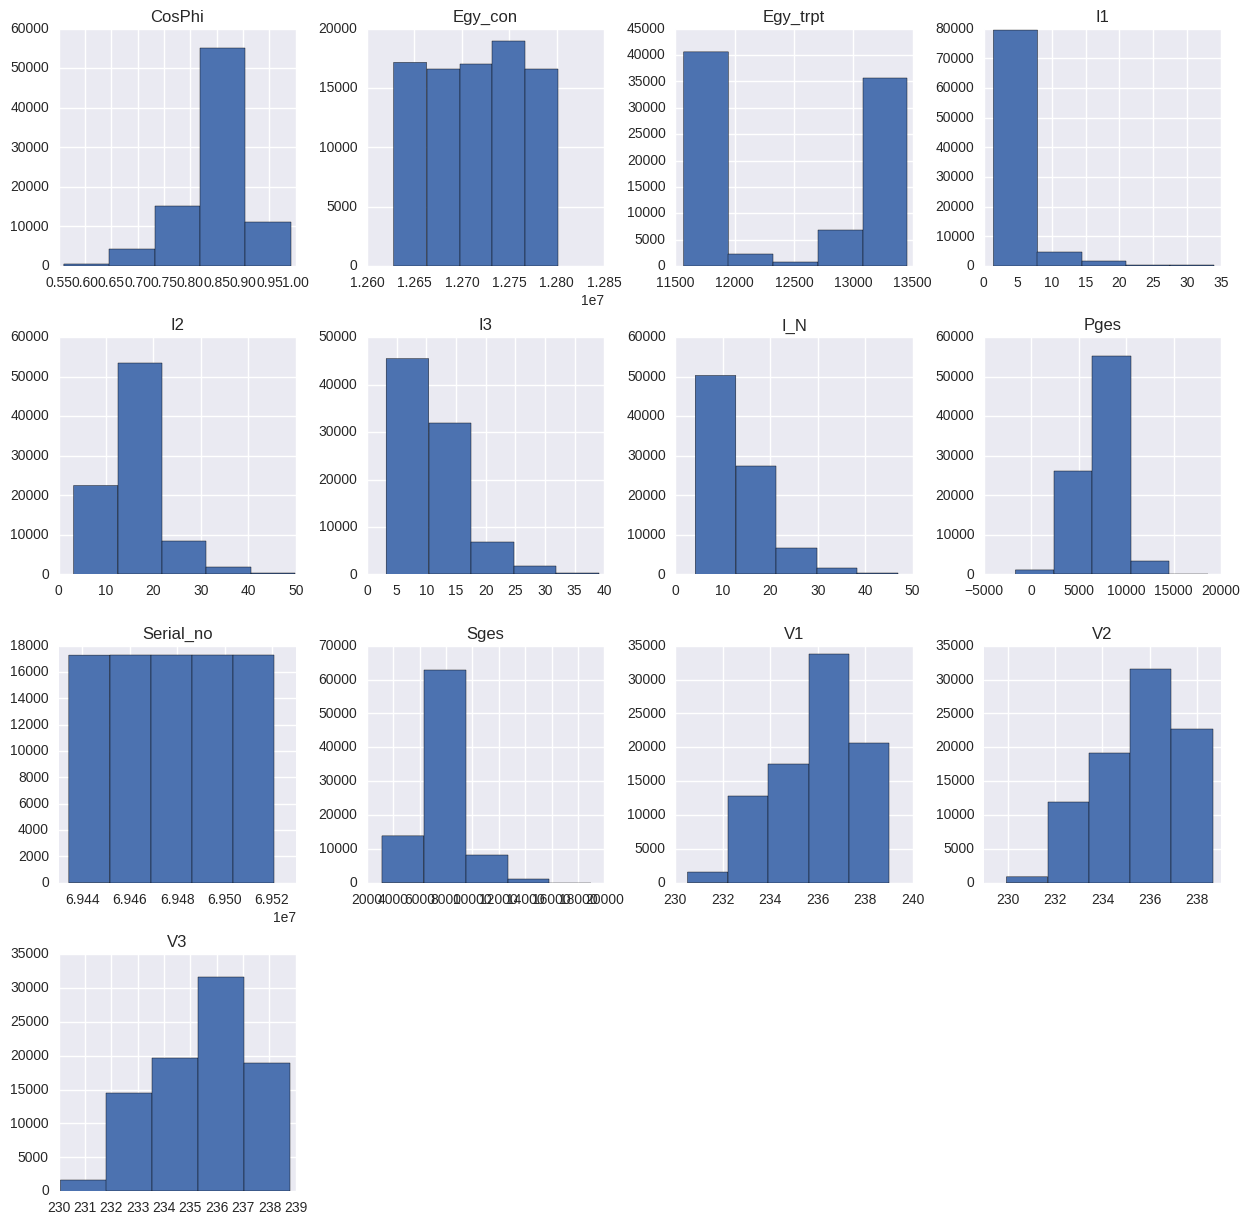

In [19]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_4050187_4654987.png')
    

# Compute only the mean of the data grouped by location and visualize

In [21]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_20012016.csv,67773610,233.097761,232.392966,232.502372,35.309886,66.496630,52.523658,28.171191,34078.736755,35736.875561,0.904735,22495.00000,24275710.425809
Torschlag_Trafo_20122015.csv,67904680,235.467689,235.065108,234.919473,7.124950,17.443828,16.963842,15.359506,9274.395366,9761.847300,0.871287,5832.95125,10127207.377244
Torschlag_Trafo_21012016.csv,68035750,233.170221,232.502217,232.477251,33.631954,55.760594,49.979533,22.277816,31167.054663,32481.897282,0.917016,22495.00000,25060176.615201
Torschlag_Trafo_21122015.csv,68166820,234.415480,233.864183,233.812081,35.463785,53.769257,49.424595,20.601987,30654.701471,32327.736784,0.910336,5903.00000,10590412.602963
Torschlag_Trafo_22012016.csv,68297890,233.289696,232.551297,232.713704,24.656220,47.910669,38.985802,21.432976,24865.307538,25978.315385,0.911548,22495.00000,25736904.640475
Torschlag_Trafo_22122015.csv,68428960,234.944451,234.447584,234.312664,32.486883,50.174091,47.940909,22.257956,28852.893682,30587.482875,0.904609,5903.00000,11317641.821778
Torschlag_Trafo_23012016.csv,68560030,233.771573,233.346485,233.259343,10.800211,22.895404,18.325695,14.388529,11552.726745,12135.138349,0.900473,22495.00000,26163558.803675


In [22]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_3445388_4050187.csv',sep=',')

# Plot the groupby location 

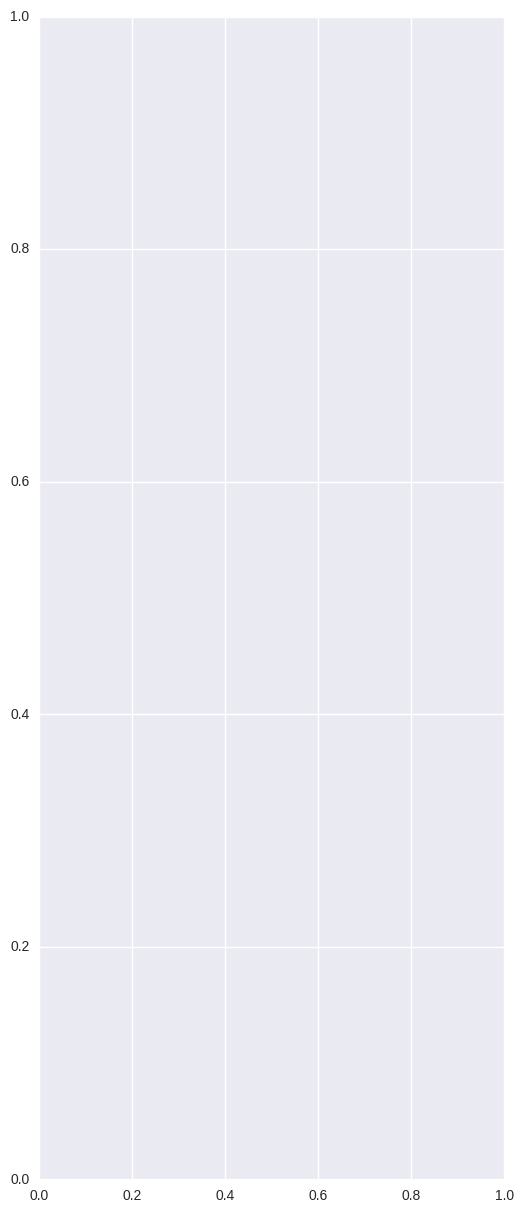

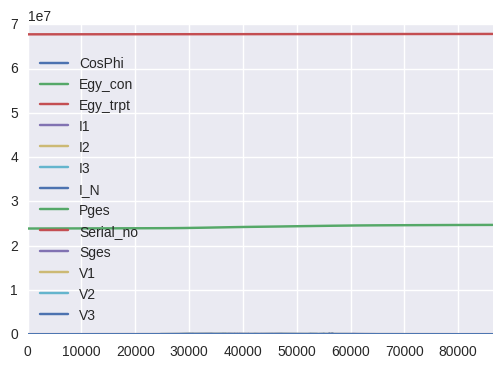

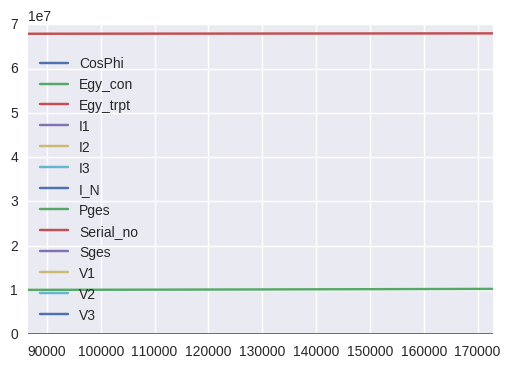

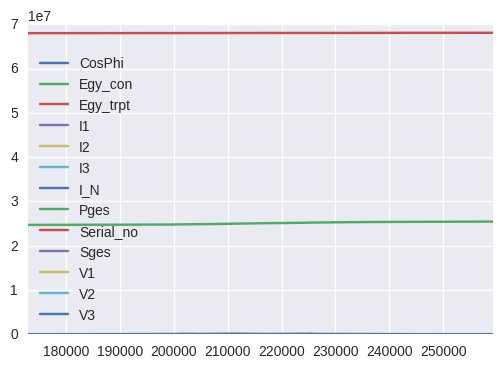

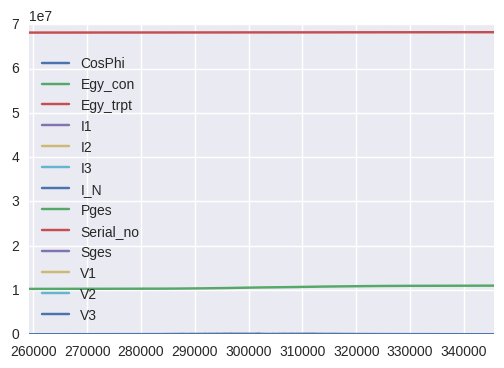

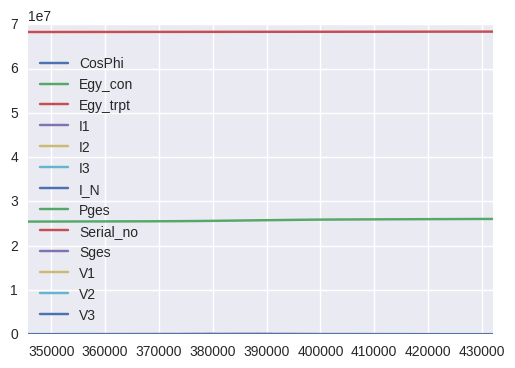

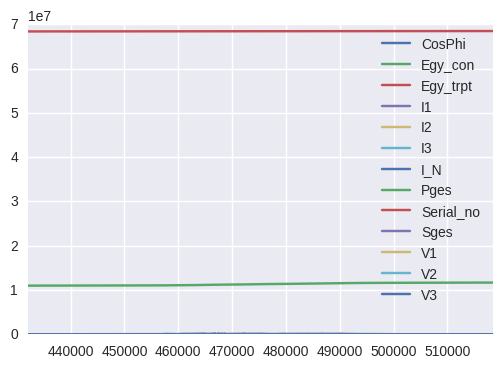

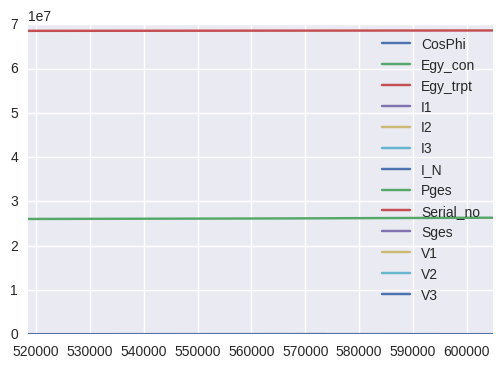

In [23]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [20]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [21]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [22]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 234.85,  234.43,  234.43,    6.37,   28.56,   15.69],
       [ 234.85,  234.43,  234.43,    6.37,   28.56,   15.69],
       [ 234.78,  234.45,  234.36,    6.34,   24.82,   15.6 ],
       ..., 
       [ 237.14,  236.8 ,  236.57,    4.74,   19.89,   10.94],
       [ 237.14,  236.8 ,  236.57,    4.74,   19.89,   10.94],
       [ 237.14,  236.8 ,  236.57,    4.74,   19.89,   10.94]])

In [23]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [24]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [25]:
Y_sklearn.shape

(604800, 6)

In [26]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-1.012255,0.215114,0.266240,0.119419,-0.048752,0.027575
1,-1.012255,0.215114,0.266240,0.119419,-0.048752,0.027575
2,-1.039810,0.130622,0.168057,0.060705,-0.065415,0.017572
3,-1.039810,0.130622,0.168057,0.060705,-0.065415,0.017572
4,-1.039810,0.130622,0.168057,0.060705,-0.065415,0.017572


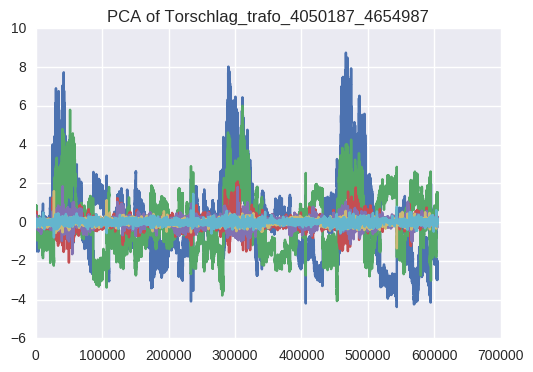

In [27]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_4050187_4654987")

fig.savefig('PCA of Torschlag_Trafo_4050187_4654987.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [28]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_23122015.csv', 'Torschlag_Trafo_24012016.csv',
       'Torschlag_Trafo_24122015.csv', 'Torschlag_Trafo_25012016.csv',
       'Torschlag_Trafo_25122015.csv', 'Torschlag_Trafo_26012016.csv',
       'Torschlag_Trafo_26122015.csv'], dtype=object)

In [29]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

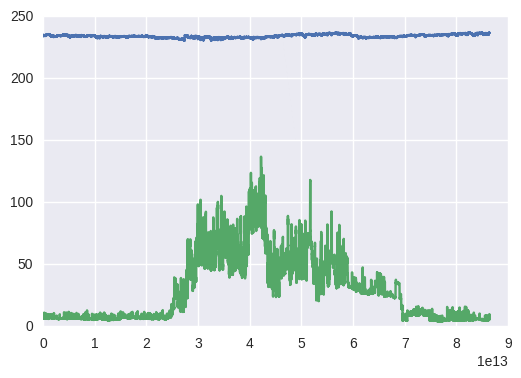

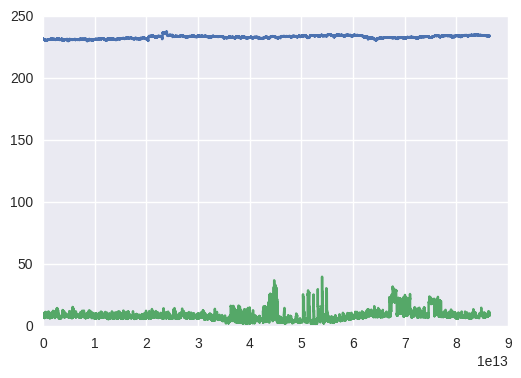

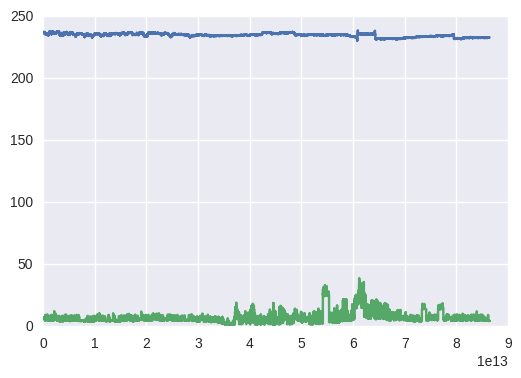

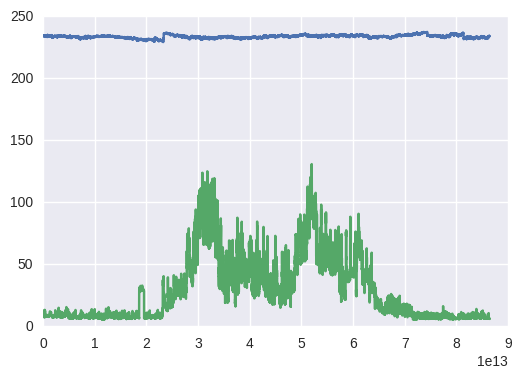

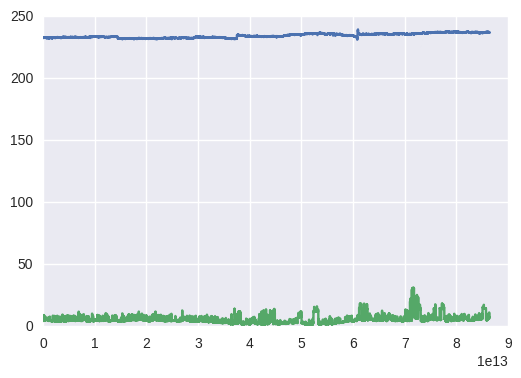

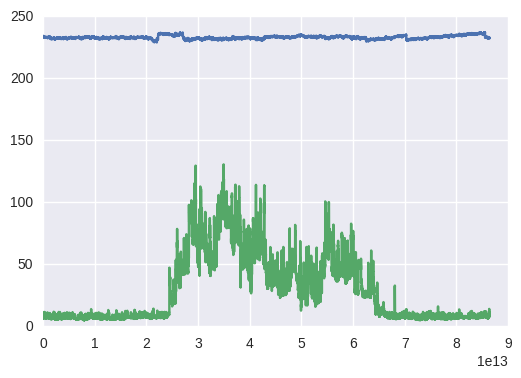

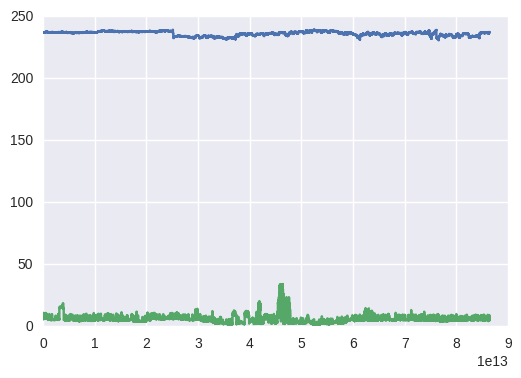

In [30]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()